## Motivation 

What is a regression problem?

Key characteristics:

- Estimating the relationship between a dependent variable (label) and independent variables (predictors, features or covariates). 

- A form of supervised learning. 

- Numeric data.


## Anatomy of Neural Networks (Simple)

![alt text](images/NN_diagram.png "NN_Diagram")

![alt text](images/regression_NN_architecture.png "regression_NN_architecture")

## Creating Sample Data

In [ ]:
# Import modules.
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

# Creating features.
X = np.array([-8.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Creating labels.
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualizing data.
plt.scatter(X, y)

# Convert NumPy arrays to tensors.
X = tf.constant(X)
y = tf.constant(y)

## Modelling with Tensor Flow

In general:

1. **Create a model**: define the input anf output layers, as well as hidden layers.

2. **Compiling a model**: define the loss function, optimier, and evaluation metrics.

3. **Fit a model**: let the model find patterns between fetures and labels.

In [ ]:
# Set random seed.
tf.random.set_seed(42)

# Initialise a model using the sequential API.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # predict y_{i} using X_{i}
])

# Compile the model.
model.compile(
    loss = tf.keras.losses.mae, 
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# Fit the model.
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

# Predicting new label.
model.predict(np.array([[17.0]]))


## Improving a Model

The previous model did not perform well. We can improve our model by altering the steps we took to create it.

1. **Creating a model**: add layers, incerease the number of hidden units within each hideen leayer, and or change theactivation function of each layer.

2. **Compiling a model**: change the optimization functions or learning rate. 

3. **Fitting a model**: increase the number of epochs or provide the model with more data.

In [ ]:
# Set random seed.
tf.random.set_seed(42)

# Initialise a model using the sequential API.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1) # predict y_{i} using X_{i}
])

# Compile the model, but this time with different optimizer.
model.compile(
    loss = tf.keras.losses.mae, 
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# Fit the model, but this time with more epochs.
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

# Predicting new label.
model.predict(np.array([[17.0]]))

# Despite having a lower MAE, when tested on new data the model performs worse. 
# This is due to overfitting. 

## Evaluating a Model

The following code chunk shows how to evaluate a model. A new model, trained on more data, is created. Afterwhich, it is evaluated.

**Note**: in general, the data should be divided into:

- **Training set ~70%**: training model.
- **Validation set ~15%**: tuning model.
- **Test set ~15%**: testing model.

We do not do that in the following code chunk.

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


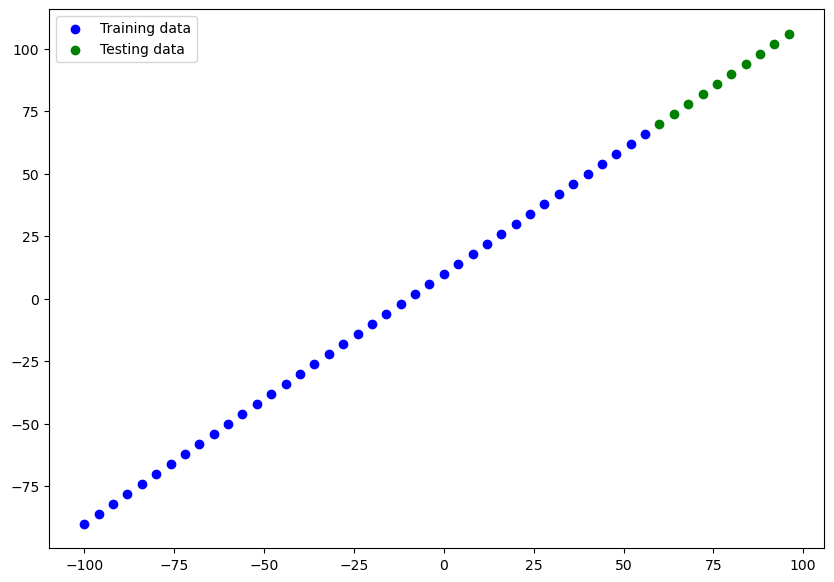

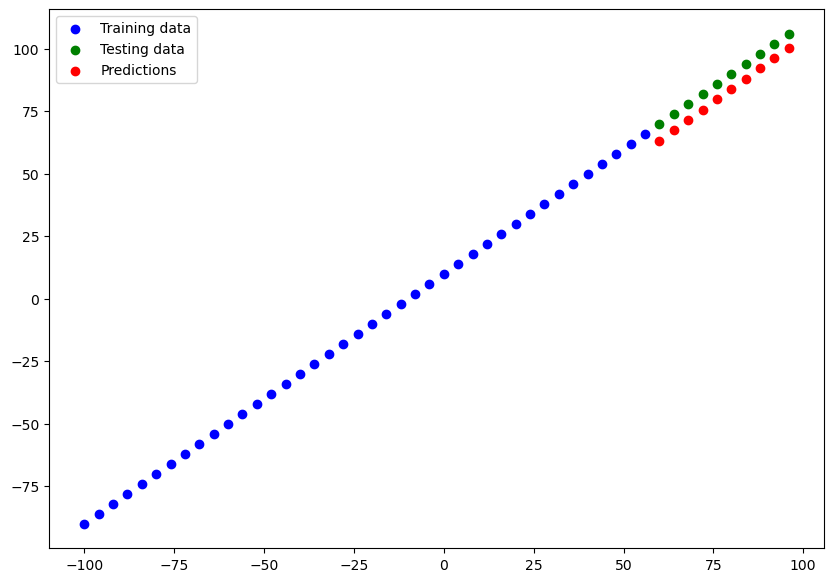

In [97]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Make a bigger dataset
X = np.arange(-100, 100, 4)

# Make labels for the dataset.
y = np.arange(-90, 110, 4)
y = X + 10

# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

# Visualise training and testing datasets.
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

# Define model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output


# Make predictions
y_preds = model.predict(X_test)

# Make predictions.
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)
